<a href="https://githubtocolab.com/DanielSanma/ProyectoIntroIA/blob/01-Exploración-de-datos-Electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')

**1. Lectura de los dataset**

In [ ]:
#Instalar kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
#Cargar los datos
!kaggle competitions download -c edsa-individual-electricity-shortfall-challenge

  0% 0.00/986k [00:00<?, ?B/s]
100% 986k/986k [00:00<00:00, 89.4MB/s]


In [ ]:
#Descomprimir el archivo zip que contiene los archivos csv
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
df = pd.read_csv('df_train.csv')
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [ ]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


**2. Análisis de la variable objetivo (load_shortfall_3h)**

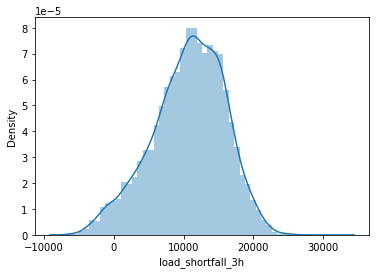

In [ ]:
#Distribución de la variable objetivo
sns.distplot(df['load_shortfall_3h'])

In [ ]:
print('Skewness de la variable objetivo', df['load_shortfall_3h'].skew())

Skewness de la variable objetivo -0.384847070902431


**Observaciones:**

1. La variable objetivo en general presenta simitria con una leve inclinación hacia la izquierda.
2. Se puede observar que el valor mas recurrente en la variable objetivo es el 10000.



**3. Datos faltantes**

In [ ]:
#Porcentaje de datos faltantes para cada variable del dataset
total           = df.isnull().sum().sort_values(ascending=False)
percent         = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
Valencia_pressure,2068,23.599224
Unnamed: 0,0,0.000000
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000
Seville_temp_max,0,0.000000
Madrid_pressure,0,0.000000
Valencia_temp_max,0,0.000000
Valencia_temp,0,0.000000
Bilbao_weather_id,0,0.000000


In [ ]:
for i in df.columns:
  print("%20s"%i, np.sum(df[i].isna()))

          Unnamed: 0 0
                time 0
   Madrid_wind_speed 0
   Valencia_wind_deg 0
      Bilbao_rain_1h 0
 Valencia_wind_speed 0
    Seville_humidity 0
     Madrid_humidity 0
   Bilbao_clouds_all 0
   Bilbao_wind_speed 0
  Seville_clouds_all 0
     Bilbao_wind_deg 0
Barcelona_wind_speed 0
  Barcelona_wind_deg 0
   Madrid_clouds_all 0
  Seville_wind_speed 0
   Barcelona_rain_1h 0
    Seville_pressure 0
     Seville_rain_1h 0
      Bilbao_snow_3h 0
  Barcelona_pressure 0
     Seville_rain_3h 0
      Madrid_rain_1h 0
   Barcelona_rain_3h 0
    Valencia_snow_3h 0
   Madrid_weather_id 0
Barcelona_weather_id 0
     Bilbao_pressure 0
  Seville_weather_id 0
   Valencia_pressure 2068
    Seville_temp_max 0
     Madrid_pressure 0
   Valencia_temp_max 0
       Valencia_temp 0
   Bilbao_weather_id 0
        Seville_temp 0
   Valencia_humidity 0
   Valencia_temp_min 0
  Barcelona_temp_max 0
     Madrid_temp_max 0
      Barcelona_temp 0
     Bilbao_temp_min 0
         Bilbao_temp 0
  Barcel

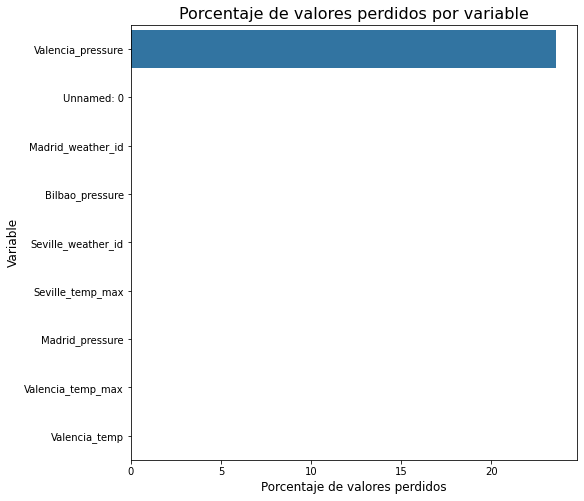

In [ ]:
#Gráfico de los porcentajes de valores perdidos para las variables
plt.figure(figsize=(8,8))
sns.barplot(x = missing_train['Valencia_pressure':'Valencia_temp'].Percent,
                    y = missing_train.index[0:9]).set_title("Porcentaje de valores perdidos por variable", fontsize=16)
plt.xlabel('Porcentaje de valores perdidos', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

**Observaciones:**

Valencia_pressure es la unica variable que presenta datos faltantes con un porcentaje del 23.6%

**3.1 Correlación entre las diferentes variables**

In [ ]:
#Matriz de correlaciones
corr_matrix = df.corr()

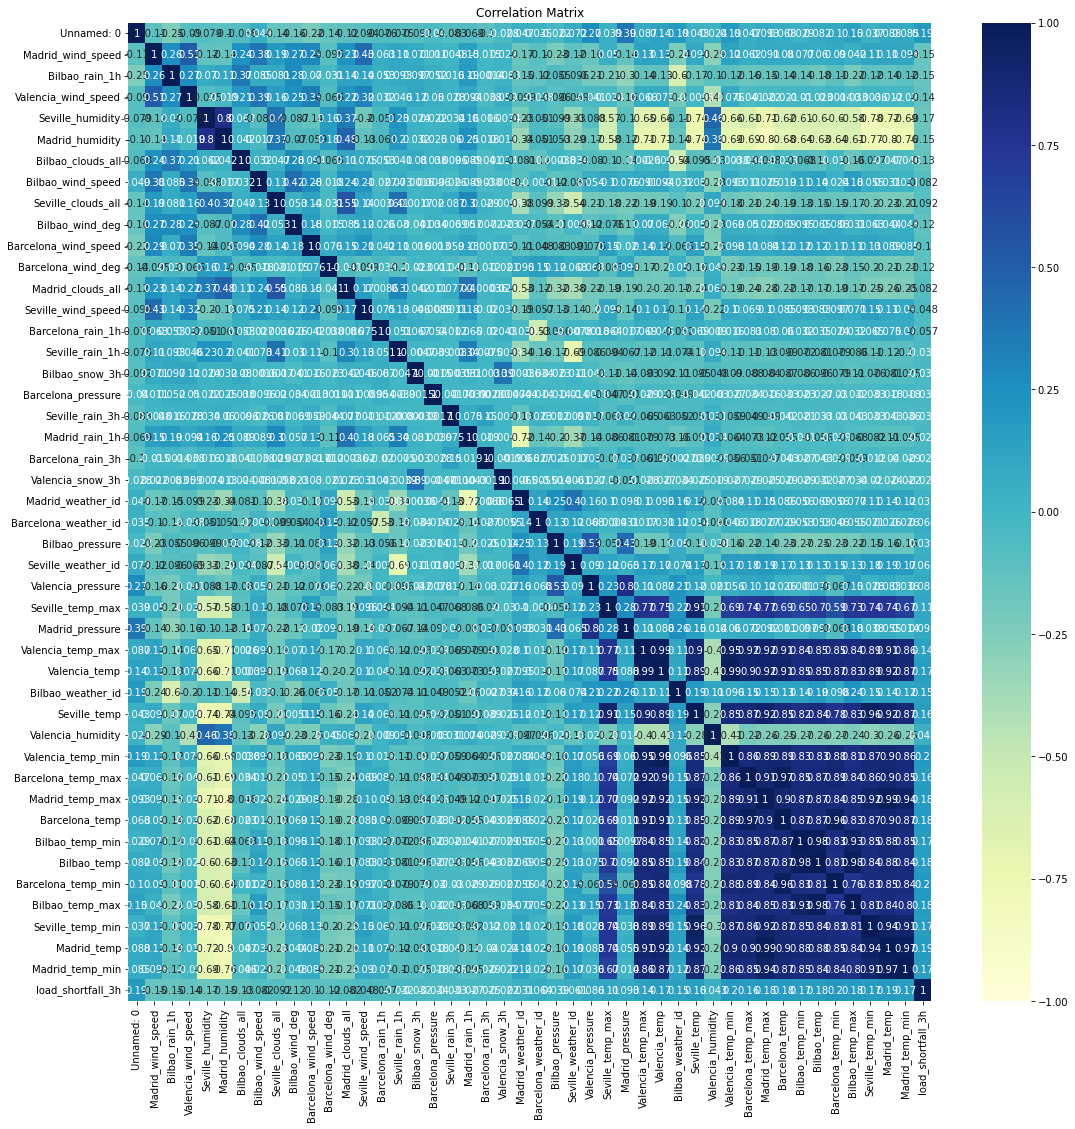

In [ ]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [ ]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["load_shortfall_3h"].sort_values(ascending=False))
target_corr_df 

,load_shortfall_3h
load_shortfall_3h,1.000000
Valencia_temp_min,0.201863
Barcelona_temp_min,0.195984
Unnamed: 0,0.192612
Madrid_temp,0.186036
Barcelona_temp,0.182673
Madrid_temp_max,0.182548
Bilbao_temp_max,0.180934
Bilbao_temp,0.176411
Madrid_temp_min,0.174744


**Observaciones:**

1. Las variables Barcelona_weather_id y Seville_weather_id tienen una correlacion alta, al igual que Madrid_temp y Barcelona_temp.
2. Muchas de las variables presentan una correlación alta.
3. Al observar las correlaciones de las variables con la variable objetivo (load_shortfall_3h), se puede observar que la mayoría de las variables numéricas no tienen una alta correlación con esta.

**3.2 Distribución de las variables numéricas**


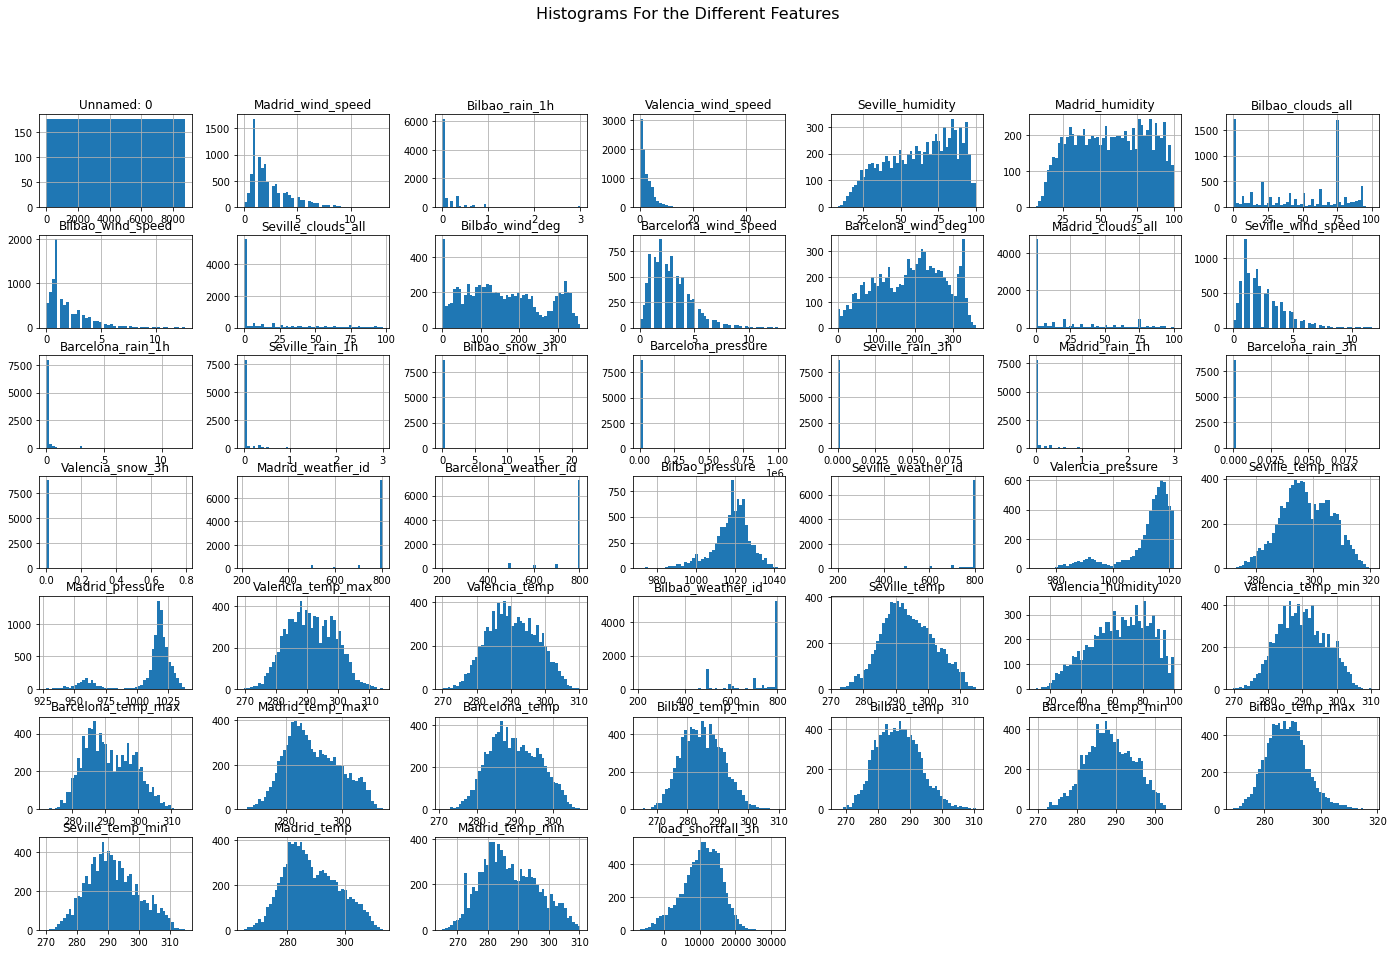

In [ ]:
#Gráficos de los histogramas de las distribuciones de las variables
df.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=16)
plt.show()

**Observaciones:**

La variables Valencia_wind_speed y Bilbao_rain_1h tienen una desviación hacia la izquierda bastante pronunciada.